In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from IPython.core.pylabtools import figsize


In [2]:
tf.__version__

'2.18.0'

In [3]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
circles = pd.DataFrame({
    'X0':X[:, 0], "X1":X[:, 1], "label": y
})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


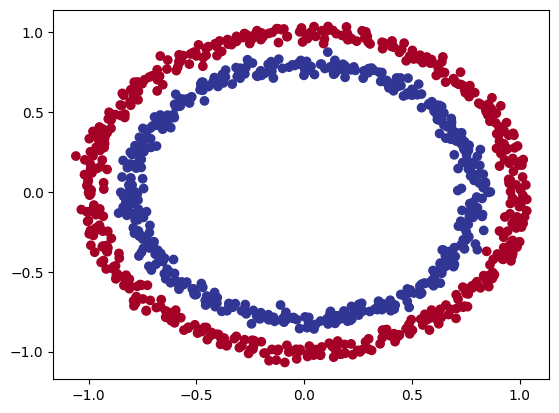

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [7]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_1.compile(optimizer=tf.keras.optimizers.SGD(), 
                loss=tf.keras.losses.BinaryCrossentropy, 
                metrics=['accuracy']
                )

history = model_1.fit(X, y, epochs=1000, verbose=0 )

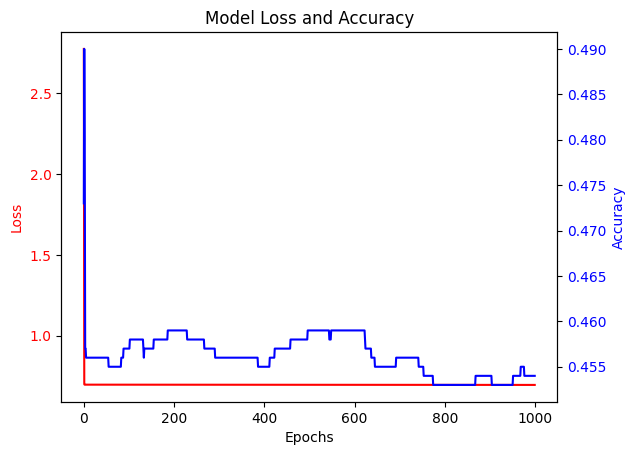

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert history to a DataFrame
df = pd.DataFrame(history.history)

# Create a figure and one set of axes
fig, ax1 = plt.subplots()

# Plot loss on ax1
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='red')
df['loss'].plot(ax=ax1, color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create another axis for accuracy
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='blue')
df['accuracy'].plot(ax=ax2, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Model Loss and Accuracy')
plt.show()

In [9]:
model_1.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4873 - loss: 0.6926


[0.6936532855033875, 0.47699999809265137]

In [10]:
####

In [11]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(optimizer=tf.keras.optimizers.Adam(), 
                loss=tf.keras.losses.BinaryCrossentropy, 
                metrics=['accuracy']
                )

history = model_2.fit(X, y, epochs=100, verbose=0 )

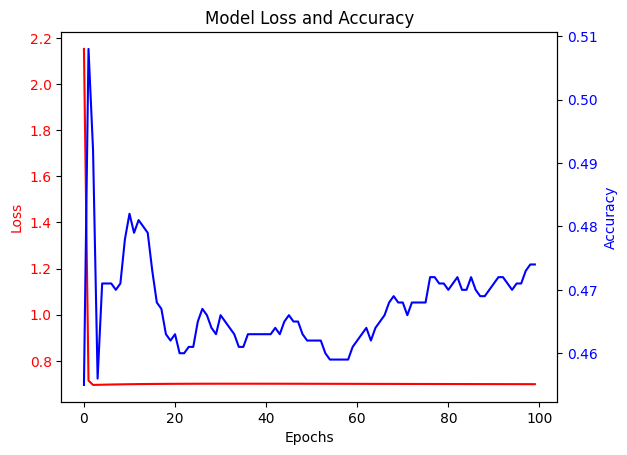

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert history to a DataFrame
df = pd.DataFrame(history.history)

# Create a figure and one set of axes
fig, ax1 = plt.subplots()

# Plot loss on ax1
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='red')
df['loss'].plot(ax=ax1, color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create another axis for accuracy
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='blue')
df['accuracy'].plot(ax=ax2, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Model Loss and Accuracy')
plt.show()

In [13]:
model_2.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5094 - loss: 0.6915


[0.6953655481338501, 0.49000000953674316]

In [14]:
import numpy as np

def plot_decision_boundaries(model, X, y):
    """
    Plot the decision boundaries of the model predicting on X
    :param model: model
    :param X: X
    :param y: y
    :return: 
    """
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                         np.linspace(y_min, y_max, 100))
    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(x_in)
    
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
doing binary classification


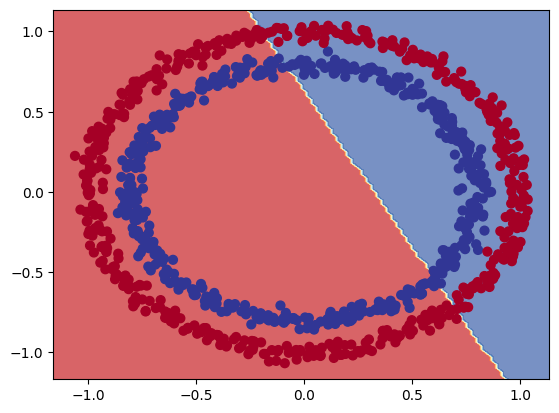

In [15]:
plot_decision_boundaries(model_2, X, y)

In [16]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(1, )),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
                

X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y= X+100


X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]


history3 =  model_3.fit(
    tf.expand_dims(X_reg_train, axis=-1), 
    y_reg_train, 
    epochs=100
)

Epoch 1/100


C:\code\tesnorflow-udemy\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 511.7112 - mae: 511.7112
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 409.6746 - mae: 409.6746
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 306.9230 - mae: 306.9230
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 201.4971 - mae: 201.4971
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 92.2429 - mae: 92.2429   
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 55.1285 - mae: 55.1285 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 80.1445 - mae: 80.1445 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 63.3205 - mae: 63.3205
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 42.4355 - mae: 42.4355 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 47.3658 - mae: 47.3658 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 40.0165 - mae: 40.0165 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 42.5983 - mae: 42.5983 
Epoch 13/100
5/5 ━━━━━━━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


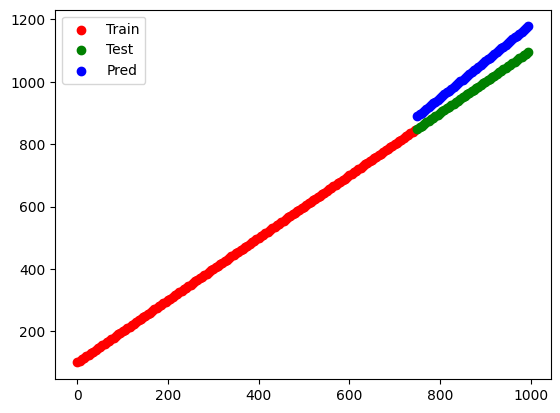

In [17]:
y_reg_preds = model_3.predict(tf.expand_dims(X_reg_test, axis=-1))

plt.scatter(X_reg_train, y_reg_train, color='red', label='Train')
plt.scatter(X_reg_test, y_reg_test, color='green', label='Test')
plt.scatter(X_reg_test, y_reg_preds, color='blue', label='Pred')
plt.legend()

Text(0.5, 0, 'epochs')

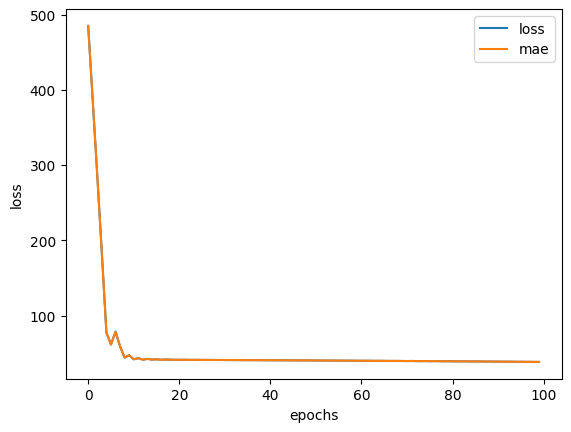

In [18]:
pd.DataFrame(history3.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [19]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(11, activation=tf.keras.activations.linear),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
])

model_4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), 
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)
history4 = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4934 - loss: 6.3324
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4964 - loss: 6.2185
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4985 - loss: 6.1824
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4960 - loss: 6.0940
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4853 - loss: 5.7762
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4728 - loss: 5.3668
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4617 - loss: 4.7727
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4506 - loss: 4.7710
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4595 - loss: 4.6482
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4539 - loss: 4.6142
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4548 - loss: 4.6040
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [20]:
model_4.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4277 - loss: 0.6931


[0.693151593208313, 0.41999998688697815]

Text(0.5, 0, 'epochs')

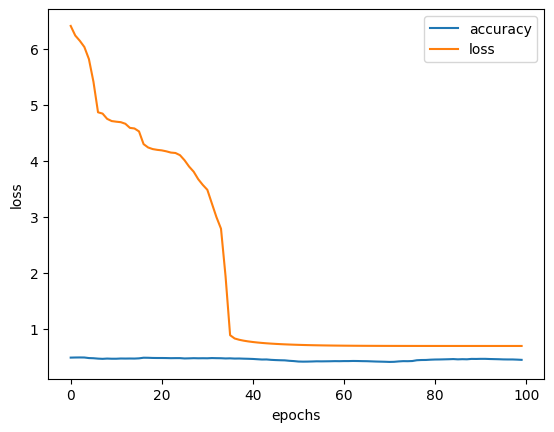

In [21]:
pd.DataFrame(history4.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

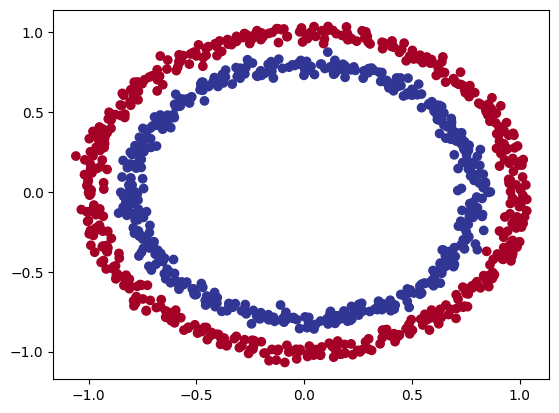

In [22]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu, label='Train')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


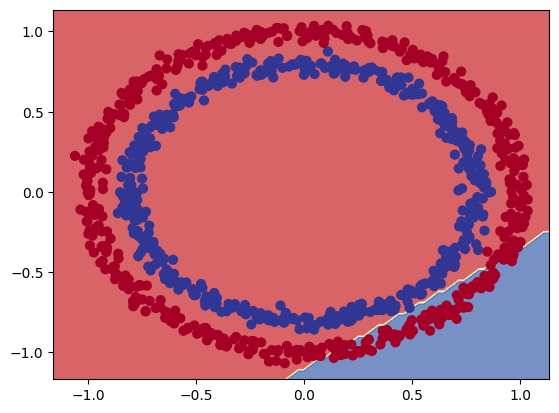

In [23]:
plot_decision_boundaries(model_4, X, y)

In [24]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(11, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),
])

model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), 
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)
history5 = model_5.fit(X, y, epochs=200)

Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4830 - loss: 3.7706
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4780 - loss: 3.1153
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3488 - loss: 2.5254
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3312 - loss: 1.5652
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3516 - loss: 0.8870
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3436 - loss: 0.8596
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3174 - loss: 0.8454
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3076 - loss: 0.8338
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2994 - loss: 0.8238
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3069 - loss: 0.8150
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3091 - loss: 0.8072
Epoch 12/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [25]:
model_5.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9980 - loss: 0.1783


[0.17024776339530945, 0.996999979019165]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification


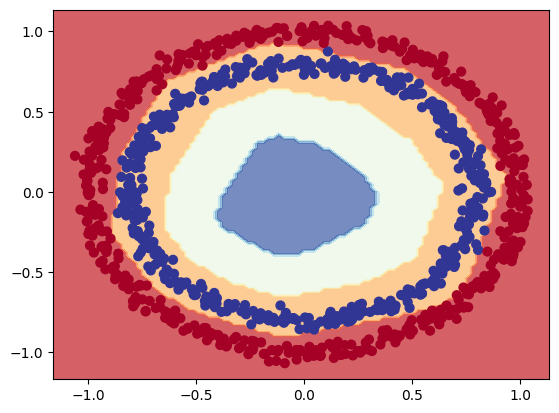

In [26]:
plot_decision_boundaries(model_5, X, y)

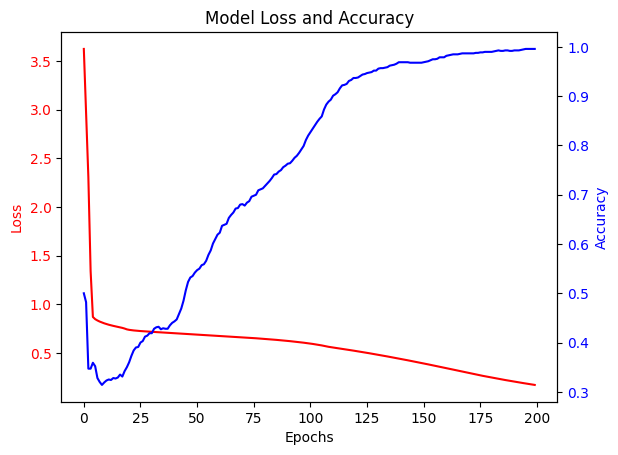

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert history to a DataFrame
df = pd.DataFrame(history5.history)

# Create a figure and one set of axes
fig, ax1 = plt.subplots()

# Plot loss on ax1
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='red')
df['loss'].plot(ax=ax1, color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create another axis for accuracy
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='blue')
df['accuracy'].plot(ax=ax2, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Model Loss and Accuracy')
plt.show()

In [28]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1),
])

model_6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
history6 = model_6.fit(X, y, epochs=200)

Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4803 - loss: 1.6597
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4046 - loss: 0.9975
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4134 - loss: 0.9100
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4328 - loss: 0.8626
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4393 - loss: 0.8315
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4393 - loss: 0.8094
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4373 - loss: 0.7931
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4356 - loss: 0.7811
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4383 - loss: 0.7721
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3950 - loss: 0.7653
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3548 - loss: 0.7601
Epoch 12/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

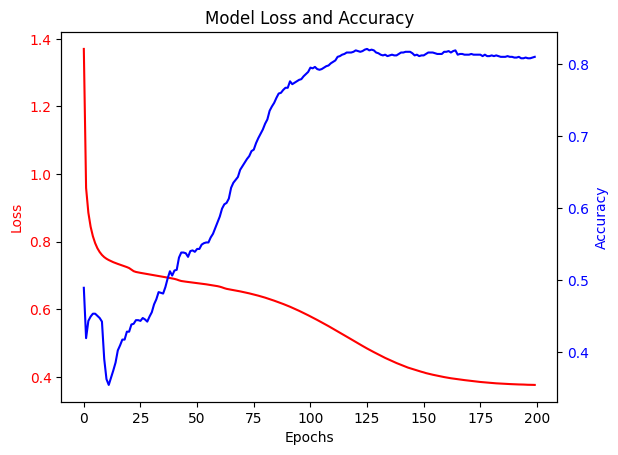

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert history to a DataFrame
df = pd.DataFrame(history6.history)

# Create a figure and one set of axes
fig, ax1 = plt.subplots()

# Plot loss on ax1
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='red')
df['loss'].plot(ax=ax1, color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create another axis for accuracy
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='blue')
df['accuracy'].plot(ax=ax2, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Model Loss and Accuracy')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification


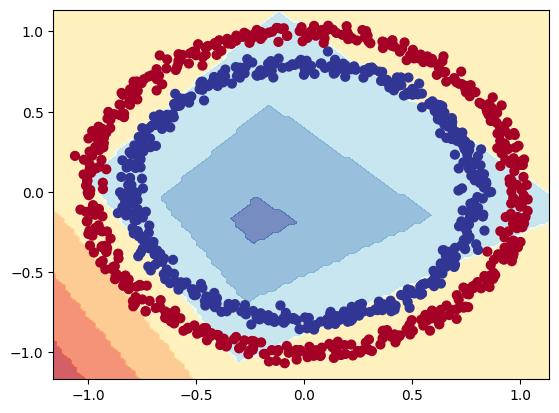

In [30]:
plot_decision_boundaries(model_6, X, y)

Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4660 - loss: 0.7251
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4652 - loss: 0.7172
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4632 - loss: 0.7116
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4613 - loss: 0.7070
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4696 - loss: 0.7033
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4761 - loss: 0.7000
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4763 - loss: 0.6972
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4774 - loss: 0.6951
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4897 - loss: 0.6932
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5059 - loss: 0.6914
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5064 - loss: 0.6897
Epoch 12/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

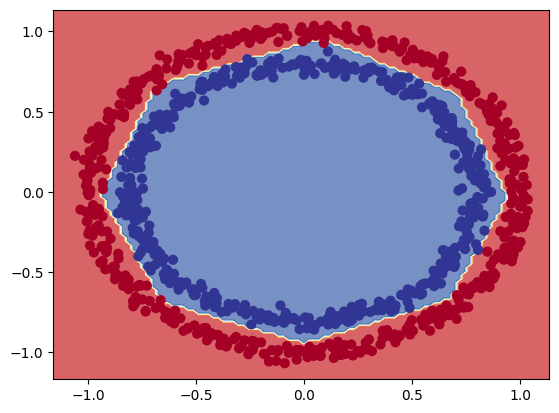

In [31]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

model_7.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
history7 = model_7.fit(X, y, epochs=200)
plot_decision_boundaries(model_7, X, y)

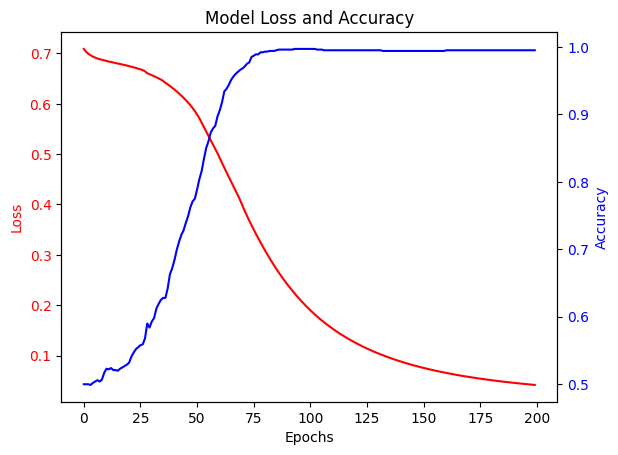

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert history to a DataFrame
df = pd.DataFrame(history7.history)

# Create a figure and one set of axes
fig, ax1 = plt.subplots()

# Plot loss on ax1
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='red')
df['loss'].plot(ax=ax1, color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create another axis for accuracy
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='blue')
df['accuracy'].plot(ax=ax2, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Model Loss and Accuracy')
plt.show()

In [33]:
model_7.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9975 - loss: 0.0409


[0.04108404368162155, 0.9950000047683716]

In [34]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set

((800, 2), (200, 2))

In [35]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history9 = model_9.fit(X_train, y_train, epochs=25, callbacks=[lr_scheduler])

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4810 - loss: 0.7066 - learning_rate: 1.0000e-04
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4890 - loss: 0.7061 - learning_rate: 1.1220e-04
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4808 - loss: 0.7056 - learning_rate: 1.2589e-04
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4766 - loss: 0.7051 - learning_rate: 1.4125e-04
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4727 - loss: 0.7045 - learning_rate: 1.5849e-04
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4813 - loss: 0.7039 - learning_rate: 1.7783e-04
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4867 - loss: 0.7034 - learning_rate: 1.9953e-04
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4848 - loss: 0.7028 - learning_rate: 2.2387e-04
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4901 - loss: 0.7022 - learning_rate: 2.5

<Axes: xlabel='epochs'>

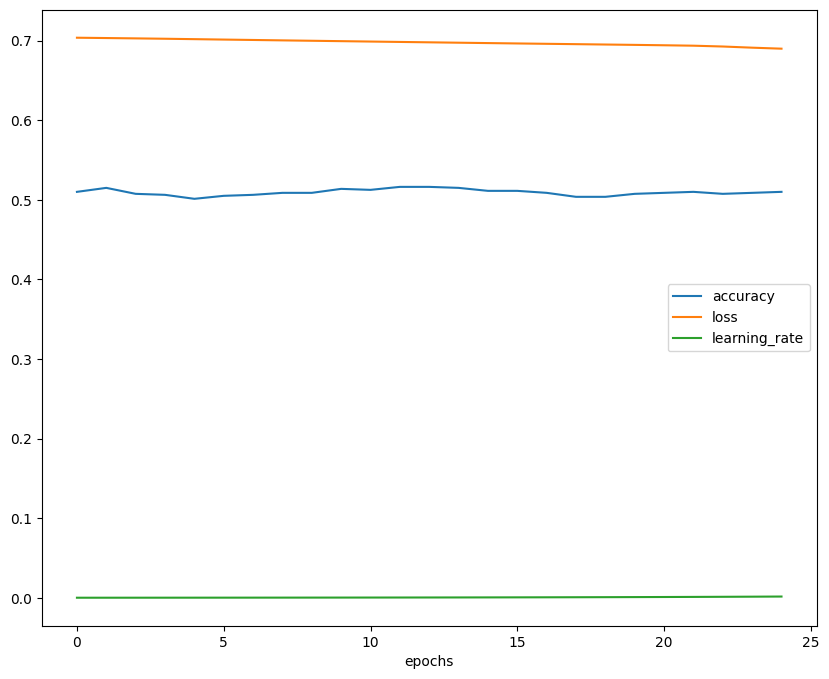

In [36]:
pd.DataFrame(history9.history).plot(figsize=(10, 8), xlabel='epochs')

ValueError: x and y must have same first dimension, but have shapes (100,) and (25,)

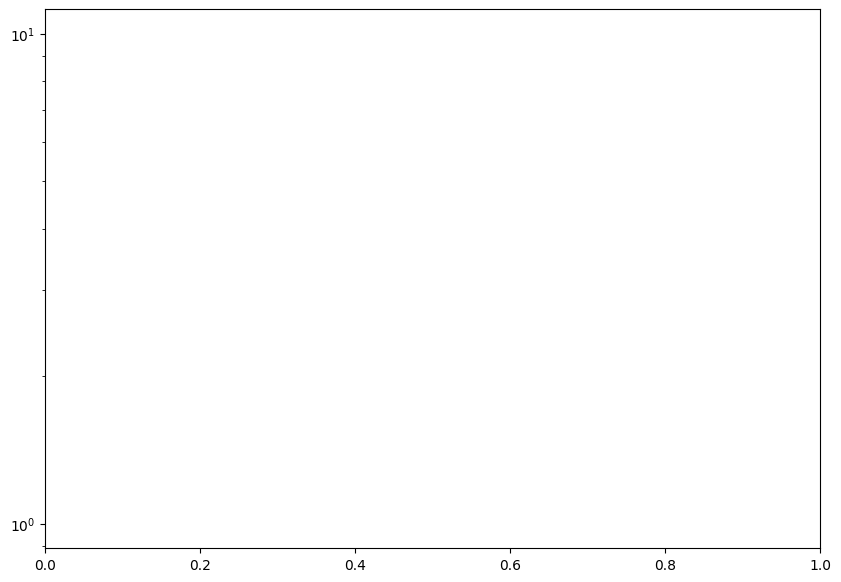

In [37]:
#plot learning rate vs loss

lrs = 1e-4 * (10 ** (tf.range(100)/200))
#lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogy(lrs, history9.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning rate vs loss')

In [6]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_10.compile(loss="binary_crossentropy", 
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), 
                 metrics=['accuracy'])

history10 = model_10.fit(X_train, y_train, epochs=20) #better accuracy then  model_7 with 10x less epochs

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5310 - loss: 0.6875 
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5526 - loss: 0.6712 
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6260 - loss: 0.6470 
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7028 - loss: 0.6053 
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7402 - loss: 0.5527 
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8035 - loss: 0.4896 
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8473 - loss: 0.4435 
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8560 - loss: 0.4069 
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8556 - loss: 0.3789 
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8654 - loss: 0.3608 
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8725 - loss: 0.3445 
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 

In [7]:
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {accuracy}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9781 - loss: 0.0813  
Model loss on the test set: 0.07901913672685623
Model accuracy on the test set: 0.9750000238418579


In [16]:
from sklearn.metrics import confusion_matrix

y_test_preds = model_10.predict(X_test)


y_test_preds = tf.round(y_test_preds)

confusion_matrix(y_test, y_test_preds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


array([[100,   1],
       [  4,  95]])

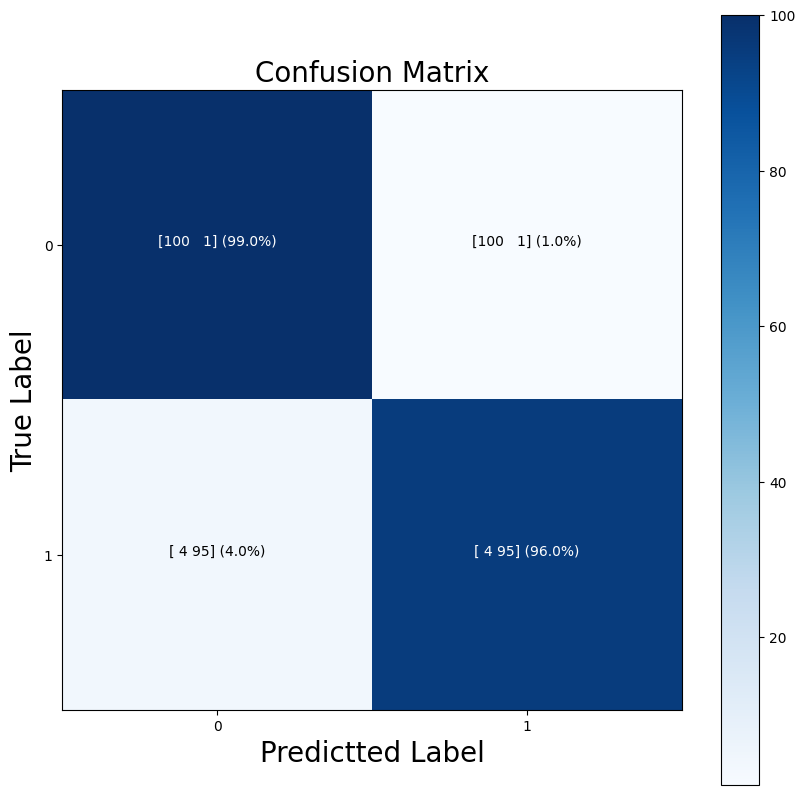

In [35]:
import itertools
import numpy as np

figsize = (10,10)

cm = confusion_matrix(y_test, y_test_preds)

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix

n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)
# create a matrix plot

cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)
classes = False

if classes:
    labels = classes
else: 
    labels = np.arange(cm.shape[0])

ax.set(
    xlabel="Predictted Label", 
    ylabel="True Label", 
    title='Confusion Matrix',
    xticks=np.arange(n_classes),
    yticks=np.arange(n_classes),
    xticklabels=labels, 
    yticklabels=labels 
)

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)
threshold = (cm.max() + cm.min()) / 2.


for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j, i, f"{cm[i,]} ({cm_norm[i,j]*100:.1f}%)",
        horizontalalignment="center",
        color="white" if cm[i,j] > threshold else "black"
    )